In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
import importlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import csbdeep


from csbdeep.utils import _raise, Path, axes_check_and_normalize,axes_dict, move_image_axes, move_channel_for_backend, backend_channels_last
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.io import load_training_data
from csbdeep.models import Config, CARE
import matplotlib.pyplot as plt
from tifffile import imread
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
import matplotlib.pyplot as plt
import os
import sys
import random
import warnings
from csbdeep.utils import Path, normalize
import numpy as np
import pandas as pd
from externalmodels.unet import *
from csbdeep.io import load_training_data
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from csbdeep.utils import axes_dict, plot_some, plot_history
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.objectives import categorical_crossentropy
import tensorflow as tf

Using TensorFlow backend.


In [2]:
(X,Y),(X_val, Y_val), axes = load_training_data('/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Raw_Datasets/JesusFilaments/SingleChannelUnetFilamentSegmentation.npz',validation_split=0.1, verbose=True)

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]
IMG_HEIGHT = X.shape[1]
IMG_WIDTH = X.shape[2]
IMG_CHANNELS = X.shape[c]
print(IMG_HEIGHT , IMG_WIDTH, IMG_CHANNELS )
print(X_val.shape)


number of training images:	 75600
number of validation images:	 8400
image size (2D):		 (64, 64)
axes:				 SYXC
channels in / out:		 1 / 1
64 64 1
(8400, 64, 64, 1)


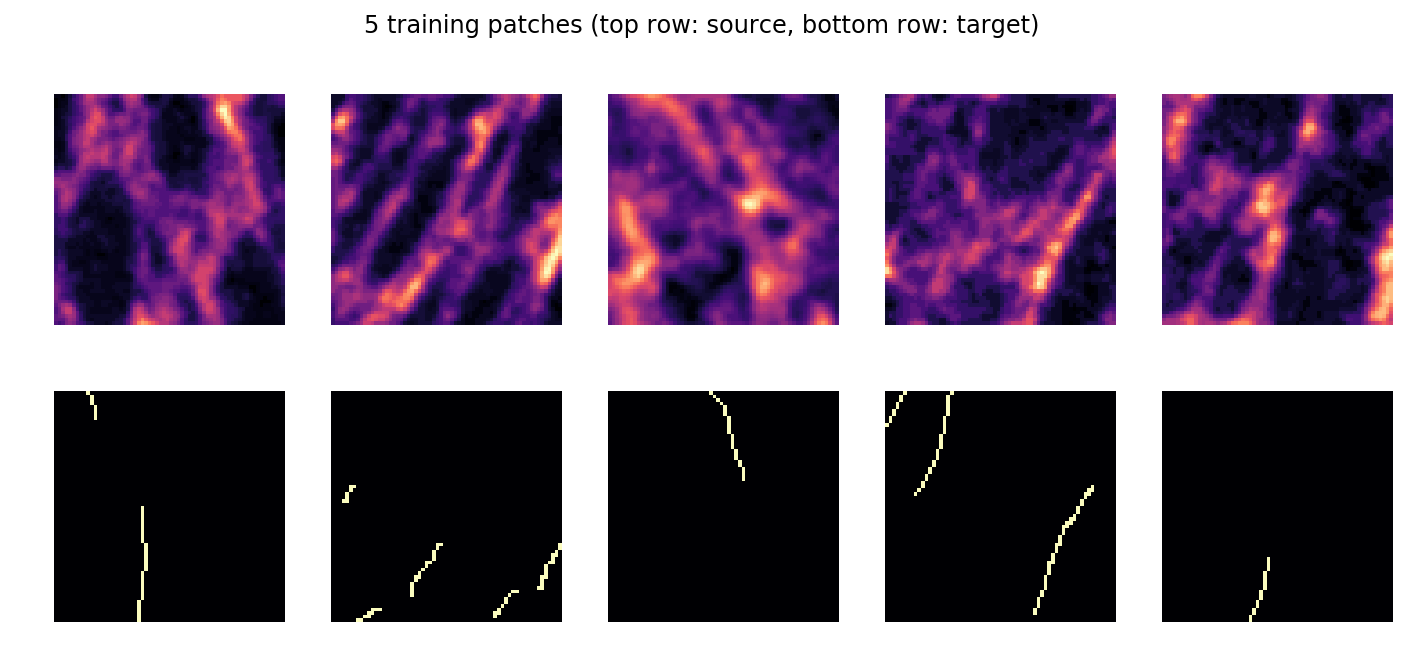

In [3]:
plt.figure(figsize=(12,5))
plot_some(X[:5],Y[:5])

plt.suptitle('5 training patches (top row: source, bottom row: target)');

In [4]:
config = Config(axes, n_channel_in, n_channel_out, train_steps_per_epoch=150,train_epochs = 400,unet_n_depth = 2, train_learning_rate = 0.02,train_batch_size = 32, unet_residual = True)
print(config)
vars(config)

Config(axes='YXC', n_channel_in=1, n_channel_out=1, n_dim=2, probabilistic=False, train_batch_size=32, train_checkpoint='weights_best.h5', train_epochs=400, train_learning_rate=0.02, train_loss='mae', train_reduce_lr={'patience': 10, 'factor': 0.5}, train_steps_per_epoch=150, train_tensorboard=True, unet_input_shape=(None, None, 1), unet_kern_size=5, unet_last_activation='linear', unet_n_depth=2, unet_n_first=32, unet_residual=True)


{'axes': 'YXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'n_dim': 2,
 'probabilistic': False,
 'train_batch_size': 32,
 'train_checkpoint': 'weights_best.h5',
 'train_epochs': 400,
 'train_learning_rate': 0.02,
 'train_loss': 'mae',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10},
 'train_steps_per_epoch': 150,
 'train_tensorboard': True,
 'unet_input_shape': (None, None, 1),
 'unet_kern_size': 5,
 'unet_last_activation': 'linear',
 'unet_n_depth': 2,
 'unet_n_first': 32,
 'unet_residual': True}

In [5]:
model = CARE(config, 'JesusFilamentSingleChannelUNet', basedir='/data/u934/service_imagerie/v_kapoor/CurieDeepLearningModels/')

/data/u934/service_imagerie/v_kapoor/anaconda2/envs/tensorflowpy3pt5/lib/python3.5/site-packages/csbdeep/models/care_standard.py:99: UserWarning: output path for model already exists, files may be overwritten: /data/u934/service_imagerie/v_kapoor/CurieDeepLearningModels/JesusFilamentSingleChannelUNet
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


In [6]:
history = model.train(X,Y, validation_data=(X_val,Y_val))

Epoch 1/400
150/150 [==============================] - 27s 183ms/step - loss: 251896990251918295040.0000 - mse: inf - mae: 251896991542011953152.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 2/400
150/150 [==============================] - 25s 169ms/step - loss: 254829245031927480320.0000 - mse: inf - mae: 254829247025708531712.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 3/400
150/150 [==============================] - 25s 169ms/step - loss: 260899257595942404096.0000 - mse: inf - mae: 260899259120598515712.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 4/400
150/150 [==============================] - 26s 170ms/step - loss: 256105265395474104320.0000 - mse: inf - mae: 256105267037411442688.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 5/400
150/150 [===========

Epoch 34/400
150/150 [==============================] - 26s 172ms/step - loss: 255707572215629348864.0000 - mse: inf - mae: 255707574561254178816.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 35/400
150/150 [==============================] - 26s 171ms/step - loss: 254693208762089373696.0000 - mse: inf - mae: 254693210638589263872.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 36/400
150/150 [==============================] - 26s 171ms/step - loss: 257789094680403410944.0000 - mse: inf - mae: 257789097377871921152.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 37/400
150/150 [==============================] - 26s 171ms/step - loss: 252804500526643085312.0000 - mse: inf - mae: 252804502989549174784.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 38/400
150/150 [======

Epoch 67/400
150/150 [==============================] - 26s 171ms/step - loss: 259848538130723078144.0000 - mse: inf - mae: 259848539538097963008.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 68/400
150/150 [==============================] - 26s 172ms/step - loss: 256224835731018252288.0000 - mse: inf - mae: 256224837490236915712.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 69/400
150/150 [==============================] - 26s 171ms/step - loss: 253049852060373843968.0000 - mse: inf - mae: 253049853467748761600.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 70/400
150/150 [==============================] - 26s 171ms/step - loss: 257387550571033591808.0000 - mse: inf - mae: 257387552330252189696.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 71/400
150/150 [======

Epoch 100/400
150/150 [==============================] - 26s 171ms/step - loss: 257604945540952489984.0000 - mse: inf - mae: 257604948355702259712.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 101/400
150/150 [==============================] - 26s 171ms/step - loss: 260178976969726164992.0000 - mse: inf - mae: 260178979080788475904.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000

Epoch 00101: ReduceLROnPlateau reducing learning rate to 1.9531249563442543e-05.
Epoch 102/400
150/150 [==============================] - 26s 171ms/step - loss: 262798651559754596352.0000 - mse: inf - mae: 262798653670816907264.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 103/400
150/150 [==============================] - 26s 171ms/step - loss: 253371364741459279872.0000 - mse: inf - mae: 253371367087084044288.0000 - val_loss: 257229603501548601344.

150/150 [==============================] - 26s 171ms/step - loss: 257788530909481304064.0000 - mse: inf - mae: 257788533020543647744.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 133/400
150/150 [==============================] - 26s 171ms/step - loss: 257156968029330767872.0000 - mse: inf - mae: 257156970492236857344.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 134/400
150/150 [==============================] - 26s 171ms/step - loss: 254390992832594903040.0000 - mse: inf - mae: 254390994357251014656.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 135/400
150/150 [==============================] - 26s 171ms/step - loss: 256713854874431651840.0000 - mse: inf - mae: 256713855695400304640.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 136/400
150/150 [===============

Epoch 165/400
150/150 [==============================] - 26s 171ms/step - loss: 253253542013676716032.0000 - mse: inf - mae: 253253542600082915328.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 166/400
150/150 [==============================] - 26s 171ms/step - loss: 256932848387655794688.0000 - mse: inf - mae: 256932850264155619328.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 167/400
150/150 [==============================] - 26s 171ms/step - loss: 255364076690706530304.0000 - mse: inf - mae: 255364076338862817280.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 168/400
150/150 [==============================] - 26s 171ms/step - loss: 258011918481654382592.0000 - mse: inf - mae: 258011920944560406528.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 169/400
150/150 [=

150/150 [==============================] - 26s 171ms/step - loss: 254513947552890322944.0000 - mse: inf - mae: 254513950133077573632.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 198/400
150/150 [==============================] - 26s 171ms/step - loss: 257847272391496007680.0000 - mse: inf - mae: 257847274502558318592.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 199/400
150/150 [==============================] - 26s 171ms/step - loss: 256683086141039968256.0000 - mse: inf - mae: 256683088017539825664.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 200/400
150/150 [==============================] - 26s 171ms/step - loss: 253157116736600047616.0000 - mse: inf - mae: 253157119785979871232.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 201/400
150/150 [===============

Epoch 230/400
150/150 [==============================] - 26s 172ms/step - loss: 261042595209395077120.0000 - mse: inf - mae: 261042596499488702464.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 231/400
150/150 [==============================] - 26s 171ms/step - loss: 256425223161875660800.0000 - mse: inf - mae: 256425224569250545664.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000

Epoch 00231: ReduceLROnPlateau reducing learning rate to 2.38418573772492e-09.
Epoch 232/400
150/150 [==============================] - 26s 171ms/step - loss: 253060452525278035968.0000 - mse: inf - mae: 253060453815371694080.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 233/400
150/150 [==============================] - 26s 171ms/step - loss: 254234071119484911616.0000 - mse: inf - mae: 254234073113265995776.0000 - val_loss: 257229603501548601344.00

150/150 [==============================] - 26s 171ms/step - loss: 254958783803771879424.0000 - mse: inf - mae: 254958784155615625216.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 263/400
150/150 [==============================] - 26s 171ms/step - loss: 259366122624825786368.0000 - mse: inf - mae: 259366123445794439168.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 264/400
150/150 [==============================] - 26s 171ms/step - loss: 259810447529499656192.0000 - mse: inf - mae: 259810450578811944960.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 265/400
150/150 [==============================] - 26s 171ms/step - loss: 253717078641042259968.0000 - mse: inf - mae: 253717080517542150144.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 266/400
150/150 [===============

Epoch 295/400
150/150 [==============================] - 26s 171ms/step - loss: 257714682430904041472.0000 - mse: inf - mae: 257714684893810130944.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 296/400
150/150 [==============================] - 26s 171ms/step - loss: 255107979028771143680.0000 - mse: inf - mae: 255107978676927430656.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 297/400
150/150 [==============================] - 26s 171ms/step - loss: 257202099961659064320.0000 - mse: inf - mae: 257202101603596468224.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 298/400
150/150 [==============================] - 26s 171ms/step - loss: 257428519136612548608.0000 - mse: inf - mae: 257428521130393698304.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 299/400
150/150 [=

150/150 [==============================] - 26s 171ms/step - loss: 256110523053759201280.0000 - mse: inf - mae: 256110524344271077376.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 328/400
150/150 [==============================] - 26s 172ms/step - loss: 253228399847788249088.0000 - mse: inf - mae: 253228401724288073728.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 329/400
150/150 [==============================] - 26s 171ms/step - loss: 257872164631061430272.0000 - mse: inf - mae: 257872167563092426752.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 330/400
150/150 [==============================] - 26s 171ms/step - loss: 257082232200889466880.0000 - mse: inf - mae: 257082233490983124992.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 331/400
150/150 [===============

Epoch 360/400
150/150 [==============================] - 26s 171ms/step - loss: 256498124829000007680.0000 - mse: inf - mae: 256498125415406206976.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 361/400
150/150 [==============================] - 26s 171ms/step - loss: 254728943417757728768.0000 - mse: inf - mae: 254728947522601156608.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000

Epoch 00361: ReduceLROnPlateau reducing learning rate to 2.91038298062124e-13.
Epoch 362/400
150/150 [==============================] - 26s 171ms/step - loss: 260369754023909949440.0000 - mse: inf - mae: 260369755431284834304.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 363/400
150/150 [==============================] - 26s 171ms/step - loss: 257602561447899758592.0000 - mse: inf - mae: 257602563324399616000.0000 - val_loss: 257229603501548601344.00

150/150 [==============================] - 26s 171ms/step - loss: 256586793786069712896.0000 - mse: inf - mae: 256586795662569570304.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 393/400
150/150 [==============================] - 26s 171ms/step - loss: 252987277241020088320.0000 - mse: inf - mae: 252987278296551260160.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 394/400
150/150 [==============================] - 26s 171ms/step - loss: 253115806318716846080.0000 - mse: inf - mae: 253115810423261528064.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 395/400
150/150 [==============================] - 26s 171ms/step - loss: 258162040111170781184.0000 - mse: inf - mae: 258162040580295720960.0000 - val_loss: 257229603501548601344.0000 - val_mse: inf - val_mae: 257229606584369774592.0000
Epoch 396/400
150/150 [===============

['loss', 'lr', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


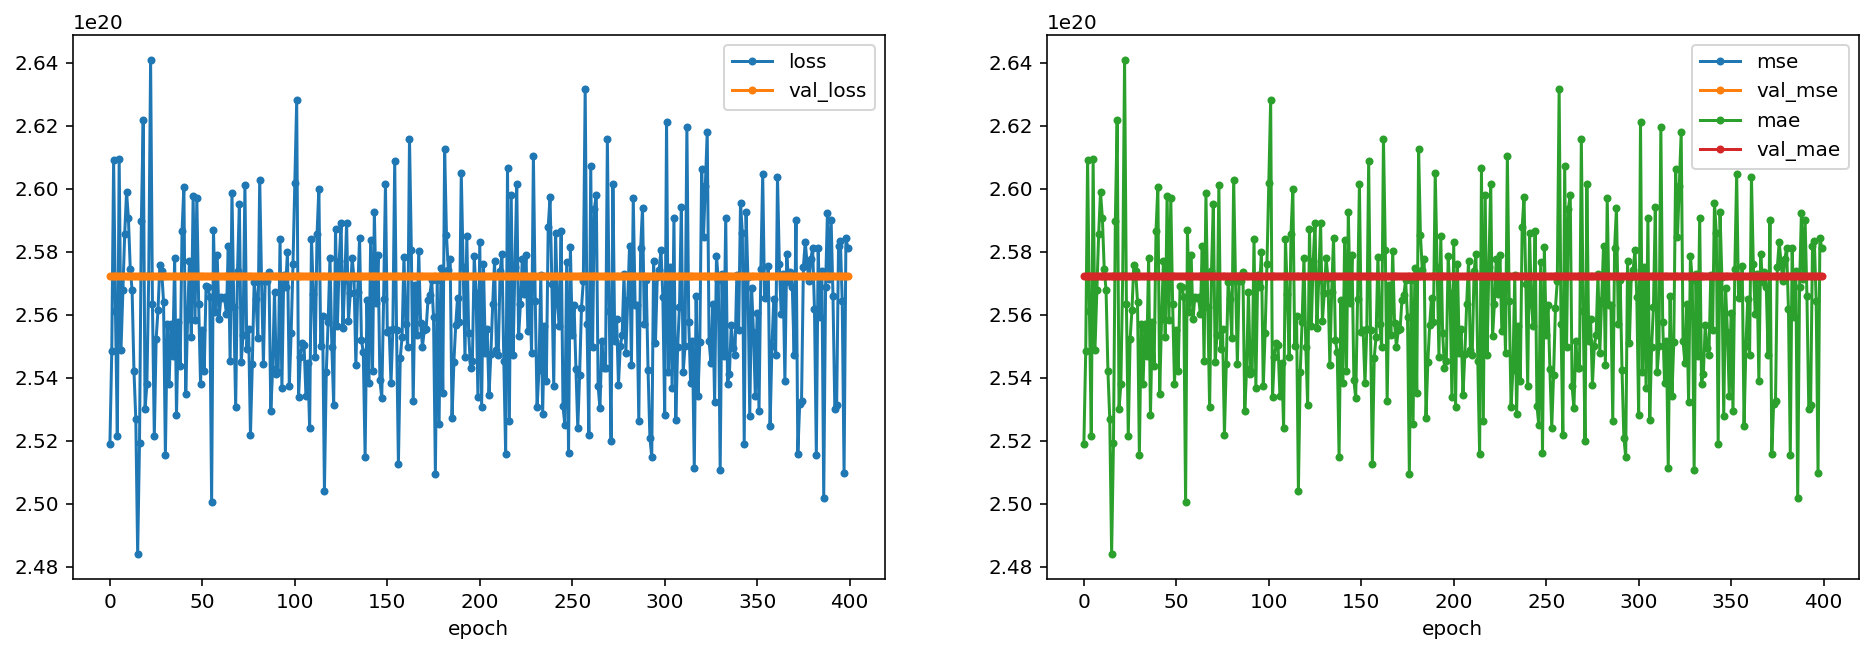

In [7]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['mse','val_mse','mae','val_mae']);

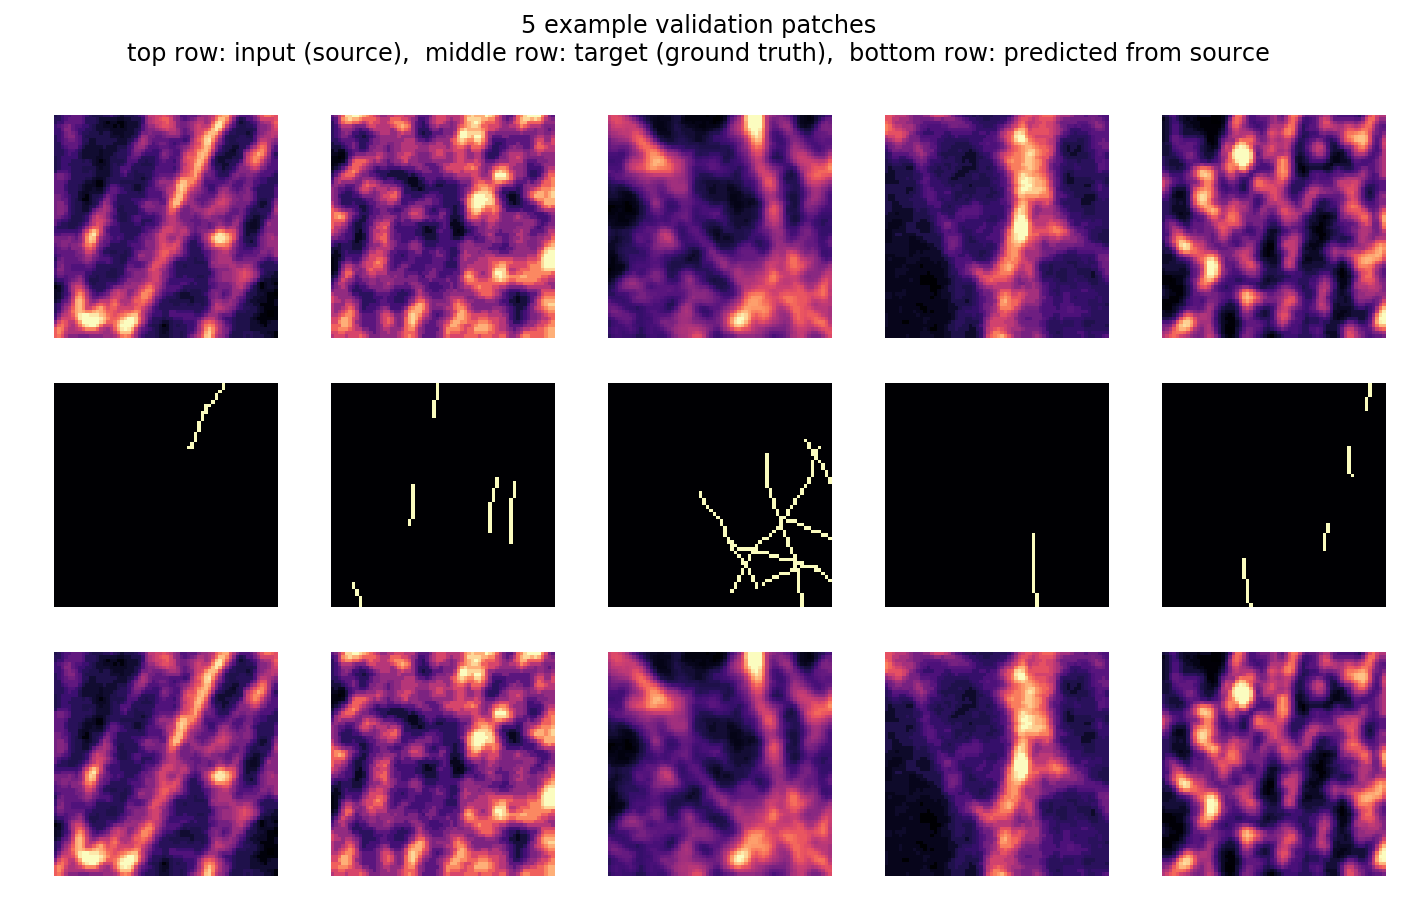

In [8]:
plt.figure(figsize=(12,7))
_P = model.keras_model.predict(X_val[:5])
if config.probabilistic:
    _P = _P[...,:(_P.shape[-1]//2)]
plot_some(X_val[:5],Y_val[:5],_P,pmax=99.5)
plt.suptitle('5 example validation patches\n'      
             'top row: input (source),  '          
             'middle row: target (ground truth),  '
             'bottom row: predicted from source');
   